In [1]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `/opt/julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/environments/v1.8/Manifest.toml`


In [2]:
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.8/Project.toml`
  No Changes to `/opt/julia/environments/v1.8/Manifest.toml`


In [7]:
include("src/Sim.jl")

Main.Sim

In [8]:
using DifferentialEquations
using Plots
using .Sim

In [32]:
#@blk ConstantブロックはIntegratorBlock()の入力ポートが一つになるように削除した
@model Tr_f_pnt begin
    
    #@parameter d_Fr_wheel #Gainブロック
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:in2 
    @blk Compare = CompareToZeroBlock()
    #@blk Thre = ThresholdBlock()
    
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Add1 => Compare
    #@connect Add1 => Thre
    
    @connect Compare => Out1
    @connect Add1 => Out2
end

Tr_f_pnt (generic function with 1 method)

In [33]:
@model TestTr_f_pnt begin
    #@parameter d_Fr_wheel k_Fr_wheel z_k_Fr_wheel_ini
    ##@blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:in1
    
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk tr_f = Tr_f_pnt() inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    @connect inin1 => r
    @connect inin2 => y

end

TestTr_f_pnt (generic function with 1 method)

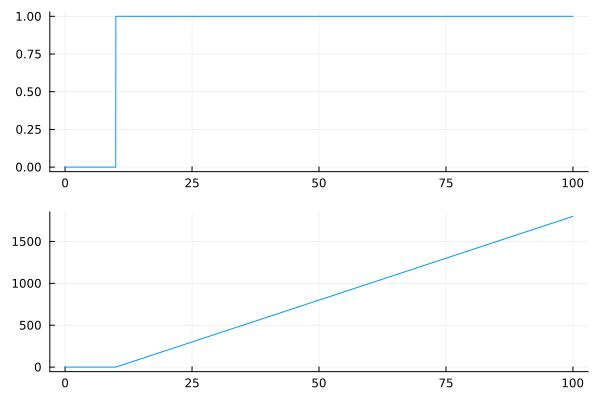

In [34]:
#初期値が未定義
m = TestTr_f_pnt();
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph